# Random Attachment: Expected Largest Degree

We consider the problem of finding the expected value $\mathbb{E}\left[K_t\right]$ of the largest node degree $K_t$ as a function of time $t = 0, 1, \dots$ in a random attachment model of network growth.

The data generating process yields a sequence $(G_t)_{t \geq 0}$ of simple graphs $G_t = (V_t, E_t)$ like so:
1. Initialise a seed graph $G_0 = (V_0, E_0)$ at time $t = 0$;
2. For each time $t \geq 1$:
    - Add a new node to the graph, such that $V_t = V_{t-1} \cup \{ t \}$;
    - Add $m \geq 1$ edges to the graph between the new node and $m$ of the existing nodes. (We do not allow multi-edges. The probability that node $t$ connects to nodes $n_{1}, \dots, n_{m} \in V_{t-1}$ is then
    \begin{equation}
        \mathbb{P}\left(E_{t} = E_{t-1} \cup \{(t, n_1), (t, n_2), \dots, (t, n_m) \}\right) = \prod_{i=1}^m \frac{1}{N(t) - i + 1},
    \end{equation}
    where $N(t) = | V_t |$.

## Finding the expected largest degree

Letting $A = \{ (t + 1, n) \in E_{t+1} : \text{degree}(n) = K_t \}$, the largest node degree evolves according to the following equation:

\begin{equation}
    K_{t+1} = K_t + \mathbb{1}\left[ A \right],
\end{equation}

where the indicator function on the RHS evaluates to 1 if a connection is made between the node added at $t+1$ and (one of) the node(s) with the largest degree at $t$. Taking expectations (over graph evolutions, not over time), we arrive at

\begin{align}
    \mathbb{E}\left[K_{t+1}\right] &= \mathbb{E}\left[K_{t}\right] + \mathbb{P}\left(A\right)\\
    &= \mathbb{E}\left[K_{t}\right] + 1 - \mathbb{P}\left(A^c\right).
\end{align}

Consider the term $\mathbb{P}(A^c)$, meaning that none of the nodes with maximum degree obtains a new connection at time $t+1$. Computing this exactly is probably tricky, since it would entail marginalising over the _number_ $N_{K_t}$ of nodes with degree $K_t$ at time $t$. To get around this, we introduce the following __approximation__:

### First attempt
#### Approximation 1: Majority of probability mass is contained by the $N_{K_t} = 1$ term, for large $t$

We then have that

\begin{align}
    \mathbb{P}(A^c) &\approx \prod_{i=1}^m \frac{N(t) - 1 - i + 1}{N(t) - i + 1}\\
    &= \prod_{i=1}^m \frac{N(t) - i}{N(t) - i + 1}\\
    &= \frac{(N(t) - 1)!}{(N(t) - m - 1)!} \frac{(N(t) - m )!}{N(t)!}\\
    &= \frac{N(t) - m}{N(t)}\\
    &= 1 - \frac{m}{N(t)},\ \ \ t >> 1.
\end{align}

We then have that

\begin{equation}
    \mathbb{E}\left[K_{t+1}\right] = \mathbb{E}\left[K_{t}\right] + \frac{m}{N(t)}.
\end{equation}

Rearranging gives

\begin{equation}
    \frac{\mathbb{E}\left[K_{t+1}\right]}{m} - \frac{\mathbb{E}\left[K_{t}\right]}{m} = \frac{1}{N(t)}.
\end{equation}

This can be solved by

\begin{equation}
    \frac{\mathbb{E}\left[K_t\right]}{m} = q + \sum_{s=0}^{t-1} \frac{1}{N(s)} = q + \sum_{s=0}^{t-1} \frac{1}{N(0) + s} = q + \sum_{s=N(0)}^{t+N(0) - 1} \frac{1}{s} = q + \sum_{s=1}^{t+N(0) -1} \frac{1}{s} - \sum_{s'=1}^{N(0)-1} \frac{1}{s'} = q + H_{t + N(0) - 1} - H_{N(0) - 1},
\end{equation}

where $H_n$ is the $n$-th Harmonic number and $q = (m-1)/m$ is a "constant of integration" obtained by setting $t=0$ and solving for $q$ and assuming the initial graph is a complete graph on $m$ nodes, so that $N(0) = m$. 

The Euler-Maclaurin formula gives that

\begin{equation}
    H_n = \log n + \gamma + \frac{1}{2n} + \epsilon_n,
\end{equation}
where $\epsilon_n \to 0$ as $n \to \infty$.

This gives that

\begin{align}
    \mathbb{E}\left[K_t\right] &\approx m \left( \log\left\{ t + m - 1 \right\} - \log\left\{ m - 1 \right\} \right) + m - 1\\
    &= \log\left( \frac{t + m - 1}{ m - 1} \right)^m + m - 1\\
    &= \log\left(\frac{t}{m - 1} - 1\right)^m + m -1 
\end{align}

So for large $t$, we should see that the expected largest degree (where expectation is taken over an ensemble of graphs evolving according to the data-generating process described at the outset) scales roughly linearly with $\log{t}$ and with gradient $m$.

#### Simulation evidence

##### Implementing the random attachment model

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def random_attachment_largest_degree(T, m, seed=None):
    
    np.random.seed(seed)
    # Start with a complete graph with m nodes
    nodes = list(range(m))
    degrees = [m-1 for node in nodes]
    max_degrees = [m-1]
    n_with_max_degrees = [m]

    for t in range(T):
        copy_nodes = nodes.copy()
        nodes += [t + m + 1]
        degrees += [m]
        np.random.shuffle(copy_nodes)
        for node in copy_nodes[:m]:
            degrees[node] += 1
        max_deg = max(degrees)
        max_degrees.append(max_deg)
        n_with_max_degrees.append(degrees.count(max_deg))

    return np.array(max_degrees), np.array(n_with_max_degrees)

##### Gathering data

In [ ]:
T = 5000
ms = range(3, 10)
num_seeds = 20
seeds = range(num_seeds)
exp_max_degrees_per_m = []
n_with_max_degs_per_m = []

for m in ms:
    print(m)
    exp_max_degrees = None
    exp_n_with_max_degs = None
    for seed in seeds:
        max_degrees, n_with_max_degs = random_attachment_largest_degree(T, m, seed)
        if exp_max_degrees is None:
            exp_max_degrees = max_degrees
            exp_n_with_max_degs = n_with_max_degs
        else:
            exp_max_degrees += max_degrees
            exp_n_with_max_degs += n_with_max_degs
    exp_n_with_max_degs = exp_n_with_max_degs / float(num_seeds)
    exp_max_degrees = exp_max_degrees / float(num_seeds)
    exp_max_degrees_per_m.append(exp_max_degrees)
    n_with_max_degs_per_m.append(exp_n_with_max_degs)

#### Compare theoretical to simulated expected max degree

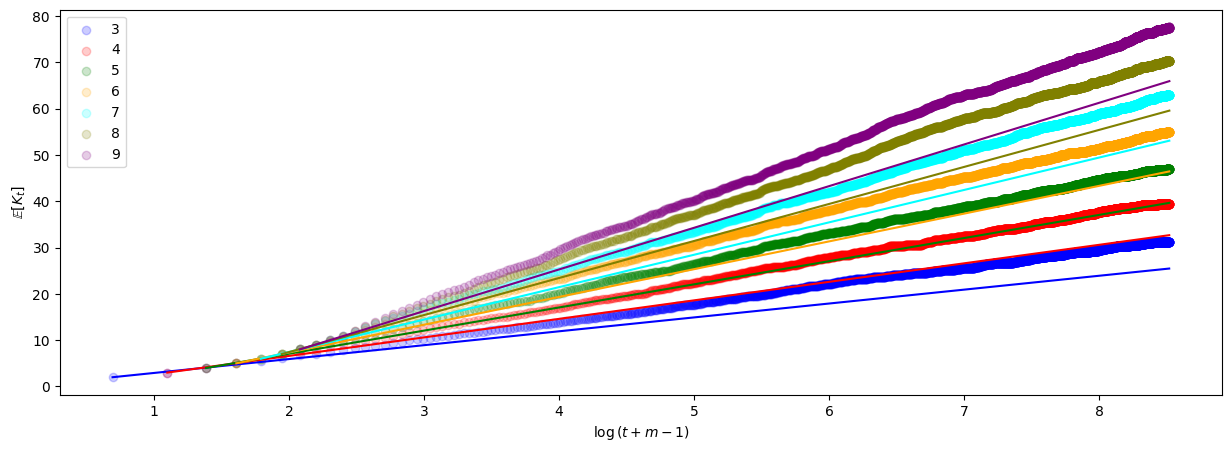

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
colors = ['b', 'r', 'g', 'orange', 'cyan', 'olive', 'purple']

for m in ms:
    exp_max_degrees = exp_max_degrees_per_m[m - min(ms)]
    log_tm1 = np.log(np.arange(exp_max_degrees.size) + m - 1)
    ax.scatter(log_tm1, 
               exp_max_degrees, 
               c=colors[m-min(ms)], label=m, alpha=0.2)
    # Predicted
    ax.plot(log_tm1, 
            m*log_tm1 -m*np.log(m-1) + m - 1, 
            c=colors[m-min(ms)])
plt.ylabel(r"$\mathbb{E}\left[K_t\right]$")
plt.xlabel(r"$\log\left(t + m - 1\right)$")
plt.legend()

The growth does appear to be approximately linear in $\log\left(t + m - 1\right)$, although the predicted gradient is too small. 

### Revising the model
#### Revised approximation: most of the probability mass is contained in the terms corresponding to $N_{K_t} \in \{1, 2\}$

Given the discrepancy between the predictions and observations in the initial attempt, we refine the solution by relaxing the assumption that all the probability mass lies in the event $N_{K_t} = 1$ and include the $N_{K_t} = 2$ case. This gives the following:

\begin{align}
    \mathbb{P}\left(A^c\right) &\approx \alpha \cdot \prod_{i=1}^m \frac{N(t) - 1 - i + 1}{N(t) - i + 1} + (1 - \alpha) \cdot \prod_{i=1}^m \frac{N(t) - 2 - i + 1}{N(t) - 1 - i + 1}\\
    &= \alpha \cdot \left[1 - \frac{m}{N(t)}\right] + (1 - \alpha) \cdot \frac{\left(N(t) - m\right)\left(N(t) - m - 1\right)}{N(t)\left(N(t) - 1\right)}
\end{align}

This gives the evolution of the expectation of the largest degree with time as

\begin{equation}
    \mathbb{E}\left[K_{t+1}\right] = \mathbb{E}\left[K_{t}\right] + 1 - \alpha \cdot \left[1 - \frac{m}{N(t)}\right] - (1 - \alpha) \cdot \frac{\left(N(t) - m\right)\left(N(t) - m - 1\right)}{N(t)\left(N(t) - 1\right)}
\end{equation}

Expanding this all out, using the fact that $N(t) = N_0 + t = m + t$ (when a complete graph of order $m$ is used as the seed graph), and simplifying leads us to the following expression:

\begin{equation}
    \frac{\mathbb{E}\left[K_{t+1}\right] - \mathbb{E}\left[K_t\right]}{m} = (1 - \alpha)\left[\frac{t}{t+m-1} - \frac{t}{t + m}\right] + \frac{1}{t+m}.
\end{equation}
This implies a solution of the form

\begin{equation}
    \frac{\mathbb{E}\left[K_t\right]}{m} = (1 - \alpha) \sum_{j=0}^{t-1} \left(\frac{j}{j+m-1} - \frac{j}{j+m}\right) + \sum_{j=0}^{t-1}\frac{1}{j+m} + q,
\end{equation}

where once again $q$ is a "constant of integration" that is to be determined. Then, noting that

\begin{equation}
    \sum_{j = 0}^{t-1} \frac{j}{j+m} = t - m\left(H_{t+m-1} - H_{m-2}\right)
\end{equation}

for $m \geq 1$, and using the approximation $H_n \approx \log{n} + \gamma$ and the fact that $\mathbb{E}\left[K_0\right] = m-1$ for complete initial seed graph, we arrive at

\begin{equation}
    \mathbb{E}\left[K_t\right] = (1-\alpha)m\left[m\log\frac{t + m - 1}{m - 1} - (m-1)\log\frac{t + m -2}{m-2}\right] + m\left[\log\frac{t + m - 1}{m-1} + \frac{m - 1}{m}\right].
\end{equation}

Note that this reduces to the case initially derived when $\alpha = 1$.

#### Simulation evidence

Using the same data as before we plot the new predictions against the data, tuning $\alpha \in [0,1]$ by hand. (You could of course set up a proper optimisation problem to find the best $\alpha$ but it's simple enough to do by hand/eye so I didn't bother.)

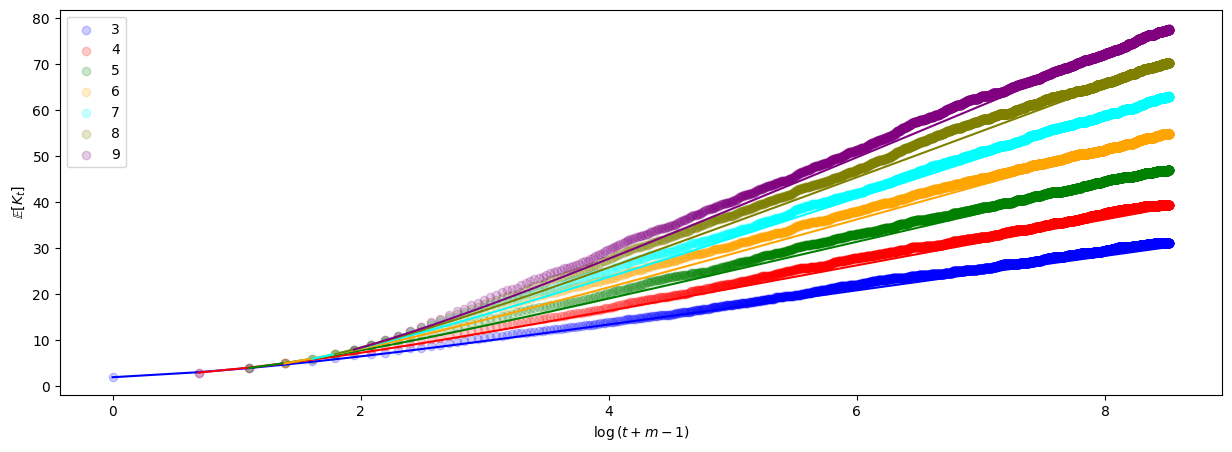

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
colors = ['b', 'r', 'g', 'orange', 'cyan', 'olive', 'purple']
alpha=0.75

for m in ms:
    # Empirical exp max degrees
    exp_max_degrees = exp_max_degrees_per_m[m - min(ms)]
    log_tm1 = np.log(np.arange(exp_max_degrees.size) + m - 1)
    log_tm2 = np.log(np.arange(exp_max_degrees.size) + m - 2)
    # Simulated data
    ax.scatter(log_tm2, 
               exp_max_degrees, 
               c=colors[m-min(ms)], label=m, alpha=0.2)
    # Predicted
    ax.plot(log_tm2, 
            (1-alpha)*m*(m*log_tm1 - m*np.log(m-1) - (m-1)*log_tm2 + (m-1)*np.log(m-2)) + m*log_tm1 - m*np.log(m-1) + m - 1, 
            c=colors[m-min(ms)])

plt.xlabel(r"$\log\left(t + m - 1\right)$")
plt.ylabel(r"$\mathbb{E}\left[K_t\right]$")

plt.legend()

The agreement is pretty good here for $\alpha = 0.75$. Mid-range values of $\log\left(t + m - 1\right)$ are slightly larger than predicted but this is probably down to the correction terms omitted in the Harmonic number approximation. I'll look into at some point.

##### Empirical expected number of nodes that have the max degree as a function of time

Text(0.5, 0, '$\\log t$')

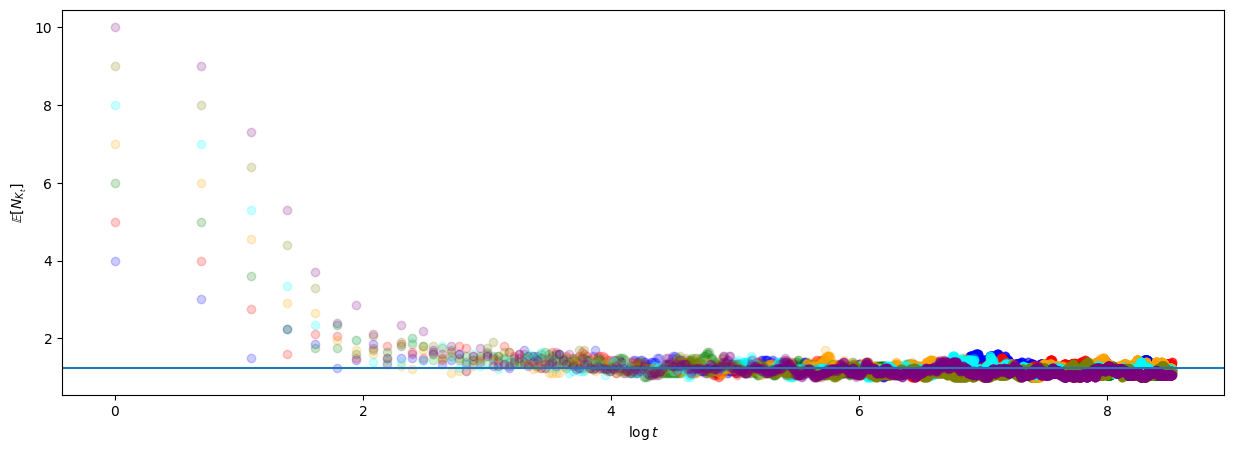

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
colors = ['b', 'r', 'g', 'orange', 'cyan', 'olive', 'purple']

for m in ms:
    n_with_max_degs = n_with_max_degs_per_m[m - min(ms)]
    ax.scatter(np.log(np.arange(exp_max_degrees.size)[1:]), 
               n_with_max_degs[1:], 
               c=colors[m-min(ms)], label=m, alpha=0.2)

ax.axhline([1.25])
ax.set_ylabel(r"$\mathbb{E}\left[N_{K_t}\right]$")
ax.set_xlabel(r"$\log t$")

The horizontal line is the value 1.25 and is roughly the value around which the empirical value of $\mathbb{E}\left[K_t\right]$ fluctuates for $t \gtrsim e^4 \approx 54$, and indeed the $\alpha$ satisfying $\alpha\cdot 1 + (1-\alpha) \cdot 2 \approx 1.25$ is $\alpha \approx 0.75$. So our approximation appears to be fairly consistent with the actual behaviour of the model.